In [14]:
import scanpy as sc

In [28]:
run_id = 'rm_acinar_tf_cd_8k'
adata_hvg = sc.read(f'data/{run_id}.h5ad')
# adata_hvg.uns["decipher"]["run_id"] = run_id

In [29]:
# Normalize total counts per cell
sc.pp.normalize_total(adata_hvg, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata_hvg)


/home/qp2134/miniconda3/envs/fa/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


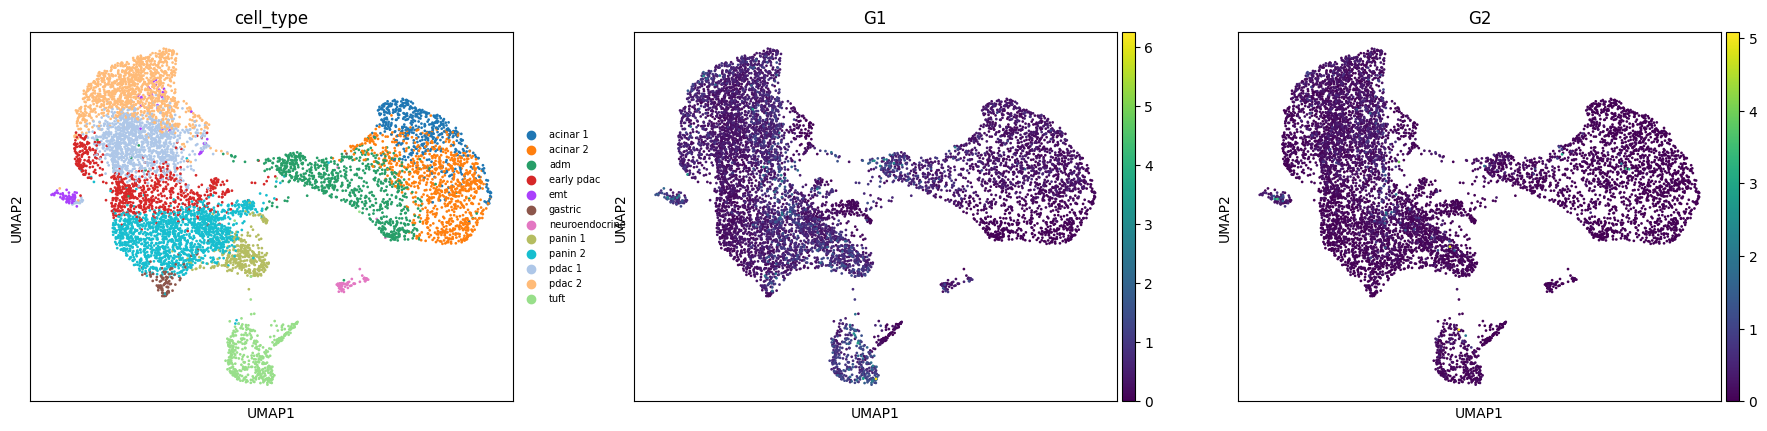

In [30]:
sc.pp.scale(adata_hvg, max_value=10)
sc.tl.pca(adata_hvg, svd_solver='arpack')
# Compute the neighborhood graph
sc.pp.neighbors(adata_hvg, n_neighbors=20, n_pcs=40)
# Run UMAP
sc.tl.umap(adata_hvg)
sc.pl.umap(adata_hvg, color=['cell_type', 'G1', 'G2'], legend_fontsize=7, save='umap_graph.png')

/home/qp2134/miniconda3/envs/fa/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


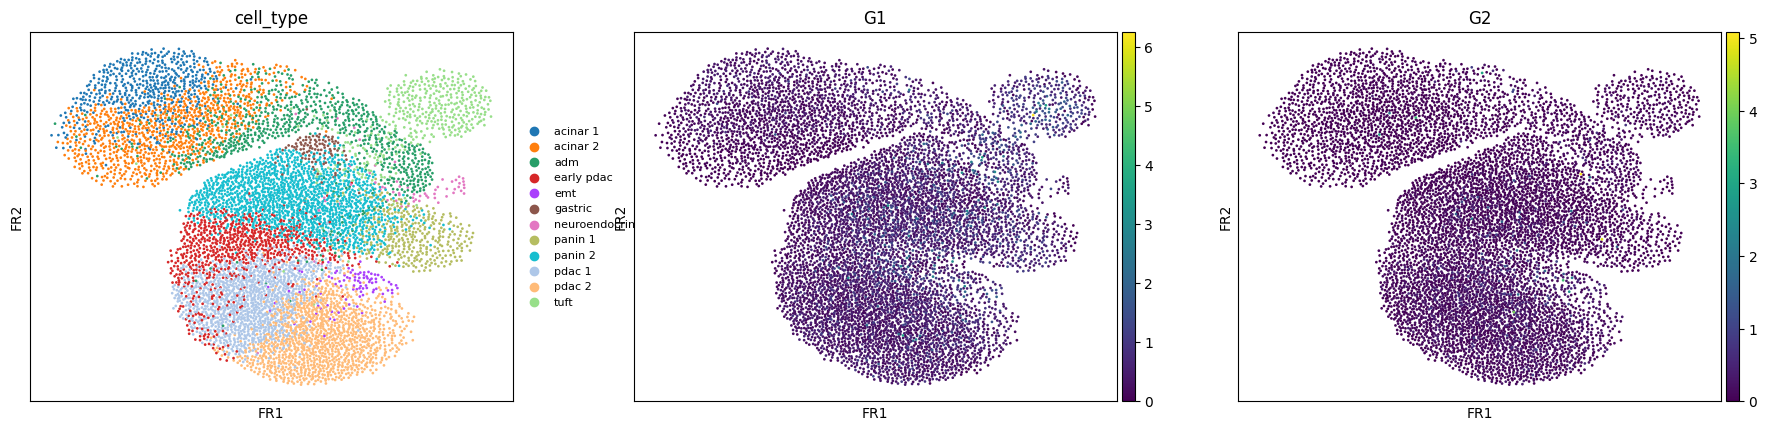

In [27]:
# scanpy graph fa/fr
sc.pp.neighbors(adata_hvg, n_neighbors=20, metric='cosine', use_rep='X')
sc.tl.draw_graph(adata_hvg, layout='fr')
sc.pl.draw_graph(adata_hvg, color=['cell_type', 'G1', 'G2'], legend_fontsize=7, save='scanpy_fr_graph.png')